<h2>Experimentation on RF model training for integration with Flask Application</h2>

<h3> Primary model for the project using Random Forest. Experimentation with using different datasets and include linguistic/language considerations to detect contextual features of email content.</h3>

In [1]:
import pandas as pd

In [2]:
#load datasets
ceas = 'data/CEAS_08.csv'
nazario = 'data/Nazario.csv'
fraud = 'data/Nigerian_Fraud.csv'
spam = 'data/SpamAssasin.csv'


In [3]:
ceas = pd.read_csv('data/CEAS_08.csv')
nazario = pd.read_csv('data/Nazario.csv')
fraud = pd.read_csv('data/Nigerian_Fraud.csv')
spam = pd.read_csv('data/SpamAssasin.csv')



In [4]:
print(ceas.head())
print(nazario.head())
print(fraud.head())
print(spam.head())

                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          Never agree to be a loser   
1  

In [5]:
#standardise columns in all datasets
ceas.columns = ['Sender', 'Receiver', 'Date', 'Subject', 'Body', 'Urls', 'Label']
nazario.columns = ['Sender', 'Receiver', 'Date', 'Subject', 'Body', 'Urls', 'Label']
fraud.columns = ['Sender', 'Receiver', 'Date', 'Subject', 'Body', 'Urls', 'Label']
spam.columns = ['Sender', 'Receiver', 'Date', 'Subject', 'Body', 'Urls', 'Label']

In [6]:
#combine together the datasets for a larger sample
combined_dataset = pd.concat([ceas, nazario, fraud, spam])

In [7]:
print(f"Combine dataset shape: {combined_dataset.shape}")

Combine dataset shape: (49860, 7)


In [8]:
print(combined_dataset.head(20))

                                               Sender  \
0                    Young Esposito <Young@iworld.de>   
1                        Mok <ipline's1983@icable.ph>   
2   Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                  Michael Parker <ivqrnai@pobox.com>   
4   Gretchen Suggs <externalsep1@loanofficertool.com>   
5   Caroline Aragon <dwthaidomainnamesm@thaidomain...   
6     Replica Watches <jhorton@thebakercompanies.com>   
7              Daily Top 10 <acidirev_1972@tcwpg.com>   
8                   qydlqcws-iacfym@issues.apache.org   
9       Daily Top 10 <orn|dent_1973@musicaedischi.it>   
10    ambrosius edwin <370jcmiller@flychautauqua.com>   
11         Alejandra Levy <rehearsings46@gametea.com>   
12      Daily Top 10 <Atchuthan-erbatest@weijgers.nl>   
13  Daily Top 10 <Scooter-obailat@picklesmaternity...   
14              Alphonso Roach <exited@realskate.com>   
15                         Racing <uqyrmo@sailing.ie>   
16  Daily Top 10 <Joep-ntorions

In [9]:
#clean the data
    #rem duplicates


#rem dups
combined_dataset = combined_dataset.drop_duplicates()

#drop rows with missings vals
combined_dataset = combined_dataset.dropna(subset=['Subject', 'Body'])

#check shape 
print(f"Combine dataset shape: {combined_dataset.shape}")

print(combined_dataset.head())

Combine dataset shape: (49772, 7)
                                              Sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         Receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              Date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             Subject  \
0                        

<h2>Normalise labels</h2>

In [10]:
print("NaNs in Label before any transformation:", combined_dataset['Label'].isna().sum())

NaNs in Label before any transformation: 0


In [11]:
#understand 
print("Original labels", combined_dataset['Label'].unique())


Original labels [1 0]


In [12]:
print(combined_dataset['Label'].value_counts())

Label
1    36073
0    13699
Name: count, dtype: int64


In [13]:
combined_dataset.to_csv('data/combined_dataset.csv', index=False)

print("Combined dataset saved as 'Combined_dataset.csv'")

Combined dataset saved as 'Combined_dataset.csv'


<h2>Feature Engineering</h2>

In [14]:
#standard
import pandas as pd
import numpy as np
import re 
import string

In [15]:
#text processing 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
print(f"Dataset Shape: {combined_dataset.shape}")

Dataset Shape: (49772, 7)


<h3>To lower, rem special char, nums, and weird punctuation, rem stopwords.</h3>

In [17]:
from textstat import flesch_reading_ease, sentence_count
from collections import Counter

In [ ]:
#func to extract stylistic features
def extract_text_features(text):
    if pd.isnull(text):
        return pd.Series([0, 0, 0, 0, 0, 0, 0]) # since is 7D feature vector, 0 vector for empty or missing
    
    num_sentences = max(sentence_count(text), 1) #avoid div by 0
    words = text.split() # split str to list of words
    num_words = len(words)
    num_chars = len(text)

    #punctuation/capitalisation
    punctuation_count = sum(1 for char in text if char in string.punctuation) #total

    #frequencies
    exclamation_count = text.count("!")
    question_count = text.count("?")

    #ratio uppercase:total txt lngth
    uppercase_ration = sum(1 for char in text if char.isupper()) / max(len(text), 1)

    #readability/sentence complexity
    readability_score = flesch_reading_ease(text) # assess txt simplicity
    avg_word_length = num_chars / max(num_words, 1) #avg lngth of words in email.
    avg_sentence_length = num_words / num_sentences #avg number of words/sentence

    #return as 7D feature vector
    return pd.Series([avg_sentence_length, avg_word_length, punctuation_count,
                      exclamation_count, question_count, uppercase_ration, readability_score])  

In [19]:
#apply to dataset
feature_names = ['avg_sentence_length', 'avg_word_length', 'punctuation_count',
                 'exclamation_count', 'question_count', 'uppercase_ration', 'readability_score']

combined_dataset[feature_names] = combined_dataset['Body'].apply(extract_text_features)
combined_dataset.head()


,Sender,Receiver,Date,Subject,Body,Urls,Label,avg_sentence_length,avg_word_length,punctuation_count,exclamation_count,question_count,uppercase_ration,readability_score
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,9.200000,5.934783,13.0,2.0,0.0,0.021978,87.52
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,9.000000,9.111111,5.0,0.0,0.0,0.012195,45.42
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,7.743590,12.973510,722.0,0.0,15.0,0.164625,-3.42
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,49.259259,9.179699,5769.0,4.0,75.0,0.007535,-39.39
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,2.000000,87.500000,13.0,0.0,0.0,0.205714,-1275.70


<h2>Detecting language anomalies</h2>

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [21]:
#func to extract n-gram frequency patterns
def extract_ngram_features(text, n=2):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0 
    
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=None, lowercase=False)
    
    try:
        X = vectorizer.fit_transform([text])
        return np.sum(X.toarray())  #sum all n-grams
    except ValueError:
        return 0  # if vocab empty then return 0

In [22]:
#apply the function
combined_dataset['bigram_count'] = combined_dataset['Body'].apply(lambda x: extract_ngram_features(str(x), 2))
#combined_dataset['trigram_count'] = combined_dataset['Body'].apply(lambda x: extract_ngram_features(str(x), 3))

In [24]:
#verify
combined_dataset[['Body', 'bigram_count']].head() 

,Body,bigram_count
0,"Buck up, your troubles caused by small dimensi...",45
1,\nUpgrade your sex and pleasures with these te...,11
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,589
3,Would anyone object to removing .so from this ...,3816
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,10


<h3>Extract sus URL features</h3>


In [25]:
def analyse_urls(text):
    urls = re.findall(f'https?://\S+|www\.\S+', text) #extract
    num_urls = len(urls)
    num_shortened_urls = sum(1 for u in urls if any(short in u for short in ["bit.ly", "tinyurl", "goo.gl"]))
    avg_url_lngth = np.mean([len(u) for u in urls]) if urls else 0
    return pd.Series([num_urls, num_shortened_urls, avg_url_lngth])

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\raider\AppData\Local\Temp\ipykernel_48788\4063913847.py:2: SyntaxWarning: invalid escape sequence '\S'
  urls = re.findall(f'https?://\S+|www\.\S+', text) #extract


In [26]:
combined_dataset[['num_urls', 'num_shortened_urls', 'avg_url_lngth']] = combined_dataset['Body'].apply(analyse_urls)


In [27]:
#check results
combined_dataset[['Body', 'num_urls', 'num_shortened_urls', 'avg_url_lngth']].head()


,Body,num_urls,num_shortened_urls,avg_url_lngth
0,"Buck up, your troubles caused by small dimensi...",1.0,0.0,21.000000
1,\nUpgrade your sex and pleasures with these te...,1.0,0.0,25.000000
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,24.0,0.0,80.166667
3,Would anyone object to removing .so from this ...,652.0,0.0,18.995399
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1.0,0.0,136.000000


<h3>Analyse suspicious words</h3>

In [28]:
imperative_wrds = {'click', 'verify', 'update', 'login', 'download', 'pay', 'confirm', 'reset'}
politeness_wrds = {'please', 'thank you', 'kindly', 'regards'}

#func to check word usage
def count_wrd_usge(text, word_list):
    words = text.lower().split()
    return sum(1 for w in words if w in word_list)

In [29]:
#apply
combined_dataset['imperative_word_count'] = combined_dataset['Body'].apply(lambda x: count_wrd_usge(str(x), imperative_wrds))
combined_dataset['politeness_word_count'] = combined_dataset['Body'].apply(lambda x: count_wrd_usge(str(x), politeness_wrds))


In [30]:
#check
combined_dataset[['Body', 'imperative_word_count', 'politeness_word_count']].head()


,Body,imperative_word_count,politeness_word_count
0,"Buck up, your troubles caused by small dimensi...",0,0
1,\nUpgrade your sex and pleasures with these te...,0,0
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,0,1
3,Would anyone object to removing .so from this ...,1,0
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,0,0


<h3> Extract special char frequency</h3>

In [31]:
def count_spcl_chars(text):
    if isinstance(text, str):
        return len(re.findall(r'[!@#$%^&*()_+={}\[\]:;"\'<>,.?/~`]', text))

In [32]:
combined_dataset['num_special_chars'] = combined_dataset['Body'].apply(count_spcl_chars)

In [33]:
combined_dataset.to_csv('data/combined_dataset_with_features.csv', index=False)
print("Dataset updated with feature extraction")

Dataset updated with feature extraction


<h3>Feature set summary</h3>
<p> 
*  avg_sentence_lngth --> Average num of words per sentence<br>
*  avg_wrd_length     --> Average char count per word<br>
*  punctuation_count  --> Total punctuation marks within email<br>
*  exclamation_count  --> Number of '!' used<br>
*  question_count     --> num of '?' used<br>
*  uppercase_ration   --> % of char in upper<br>
*  readability_score  --> ease of reading (lower = harder to read)<br>
*  bigram_count       --> Frequency of common 2-word phrases<br>
*  trigram_count      --> Frequency of common 3-word phrases<br>
*  num_urls           --> Count of URLs in email<br> 
*  num_shortened_urls --> Count of shortened links (bit.ly, tinyurl etc)<br>
*  avg_url_lngth      --> avrg URL length<br>
*  imperative_word_count --> count of demanding action words<br>
*  politeness_word_count --> count of politeness words<br><br>
<h5>Linguistic Features: n-gram counts, punctuation frequency.</h5><br>
<h5>Content features: URL presence, keyword frequency</h5><br>
<h5>Metadata features: sender domain, email length</h5>

<h2>Defining features and the labels</h2>

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [35]:
file_path = "data/combined_dataset_with_features.csv"
training_data = pd.read_csv(file_path)


In [39]:
#define feature (independent vars)
feature_columns = [
     'avg_sentence_length', 'avg_word_length', 'punctuation_count',
    'exclamation_count', 'question_count', 'uppercase_ration',
    'readability_score', 'bigram_count', 'num_urls',
    'num_shortened_urls', 'avg_url_lngth', 'imperative_word_count',
    'politeness_word_count', 'num_special_chars'
]


In [40]:
print("Columns in dataset: ", training_data.columns.tolist())

Columns in dataset:  ['Sender', 'Receiver', 'Date', 'Subject', 'Body', 'Urls', 'Label', 'avg_sentence_length', 'avg_word_length', 'punctuation_count', 'exclamation_count', 'question_count', 'uppercase_ration', 'readability_score', 'bigram_count', 'num_urls', 'num_shortened_urls', 'avg_url_lngth', 'imperative_word_count', 'politeness_word_count', 'num_special_chars']


In [41]:
#defining target (dependent var)
X = training_data[feature_columns]
y = training_data['Label'] #Phishing 1 legit 0



In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (39817, 14), Test set: (9955, 14)


<h3> Train RF </h3>

In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [70]:
#train
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
#make prediction
y_pred = rf_model.predict(X_test)

Comparing using different ML models


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [73]:
dt_model = DecisionTreeClassifier(random_state=42)

In [74]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
y_pred2 = dt_model.predict(X_test)

In [76]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [77]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred3 = knn_model.predict(X_test)

Model accuracy comparisons


In [80]:
#evaluate model performance RF
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy RF: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Model Accuracy RF: 0.9788
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2681
           1       0.99      0.98      0.99      7274

    accuracy                           0.98      9955
   macro avg       0.97      0.97      0.97      9955
weighted avg       0.98      0.98      0.98      9955



In [81]:
#evaluate model performance DT
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Model Accuracy DT: {accuracy2:.4f}")
print(classification_report(y_test, y_pred2))

Model Accuracy DT: 0.9647
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2681
           1       0.98      0.98      0.98      7274

    accuracy                           0.96      9955
   macro avg       0.96      0.96      0.96      9955
weighted avg       0.96      0.96      0.96      9955



In [82]:
#evaluate model performance KNN
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Model Accuracy KNN: {accuracy3:.4f}")
print(classification_report(y_test, y_pred3))

Model Accuracy KNN: 0.9509
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2681
           1       0.96      0.97      0.97      7274

    accuracy                           0.95      9955
   macro avg       0.94      0.94      0.94      9955
weighted avg       0.95      0.95      0.95      9955



<h3> Verify which features contribute the most in classification</h3>

In [48]:
import matplotlib.pyplot as plt

In [49]:
#get feature importance
feature_importance = rf_model.feature_importances_

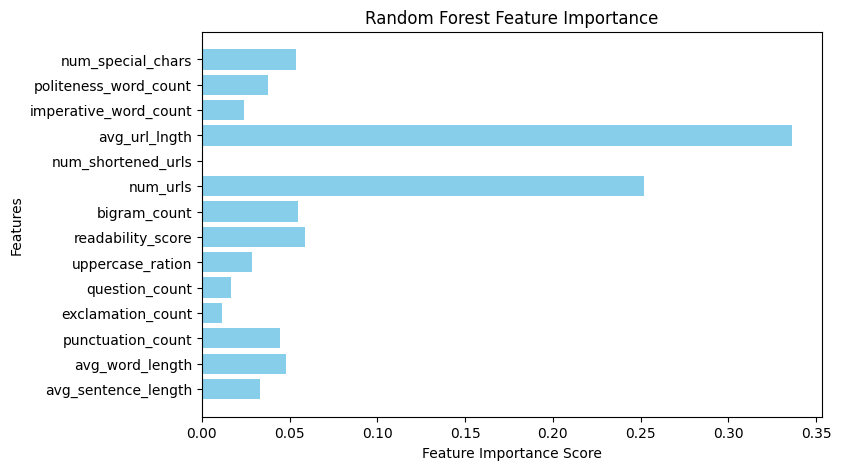

In [58]:
#plot graph of feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [51]:
import pickle

In [52]:
#save model
with open("rf_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

print("mode~l saved as rf_model.pkl")

mode~l saved as rf_model.pkl


In [53]:
print("Training Features:", list(X_train.columns))


Training Features: ['avg_sentence_length', 'avg_word_length', 'punctuation_count', 'exclamation_count', 'question_count', 'uppercase_ration', 'readability_score', 'bigram_count', 'num_urls', 'num_shortened_urls', 'avg_url_lngth', 'imperative_word_count', 'politeness_word_count', 'num_special_chars']


In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2681
           1       0.99      0.98      0.99      7274

    accuracy                           0.98      9955
   macro avg       0.97      0.97      0.97      9955
weighted avg       0.98      0.98      0.98      9955



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_test, y_pred))

[[2581  100]
 [ 111 7163]]
